# Extra Gal Project 1

## Imports

In [1]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm

In [2]:
from galaxy import Galaxy
from redshift import Redshift

## Paths

In [3]:
ROOT = sys.prefix[:-4]
DATA_DIR = ROOT + 'data/Uchuu-UM/'

FILES = [
            'Sample.01.Redshift.0.000.h5',
            'Sample.01.Redshift.1.032.h5',
            'Sample.01.Redshift.2.029.h5',
            'Sample.01.Redshift.5.155.h5'
        ]

PATHS = [DATA_DIR + f for f in FILES]

## Data processing

In [4]:
redshifts = []

for p in tqdm(PATHS):
    r = Redshift(p)
    redshifts.append(r)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/44575694 [00:00<?, ?it/s]

  0%|          | 0/37936819 [00:00<?, ?it/s]

  0%|          | 0/28383722 [00:00<?, ?it/s]

  0%|          | 0/8077069 [00:00<?, ?it/s]

In [6]:
print(redshifts[0])
print(redshifts[1].galaxies[0])

<Redshift Box:750 Ngalaxies:44575694 Redshift:2.0000399672426283e-05>
<Galaxy x:-355.1214904785156 y:-349.6589050292969 z:-355.1214904785156 M:34920000913408.0 SM:217783304192.0 SFR:0.2941786050796509 ID:-1>


## Data visualization

In [7]:
SM_K = 1/(10**13)

In [9]:
x = []
y = []
s = []

for i in trange(len(redshifts)):
    x.append([])
    y.append([])
    s.append([])
    for j in trange(redshifts[i].Ngalaxies):
        if redshifts[i].galaxies[j].z >= 0 and redshifts[i].galaxies[j].z <= 10:
            x[i].append(redshifts[i].galaxies[j].x)
            y[i].append(redshifts[i].galaxies[j].y)
            s[i].append(SM_K*redshifts[i].galaxies[j].SM)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/44575694 [00:00<?, ?it/s]

  0%|          | 0/37936819 [00:00<?, ?it/s]

  0%|          | 0/28383722 [00:00<?, ?it/s]

  0%|          | 0/8077069 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


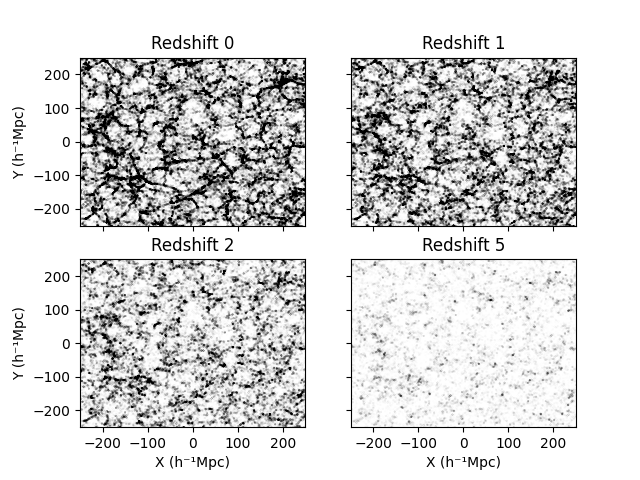

In [10]:
%matplotlib notebook

fig, axs = plt.subplots(2, 2)

for i, ax in enumerate(axs.flat):
    ax.scatter(x[i], y[i], s=s[i], c ='black')
    ax.set(xlabel='X (h⁻¹Mpc)', ylabel='Y (h⁻¹Mpc)')
    ax.set_title(f'Redshift {int(redshifts[i].Redshift)}')
    ax.set_xlim(-250, 250)
    ax.set_ylim(-250, 250)

for ax in axs.flat:
    ax.label_outer()